In [2]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------  16.0/16.1 MB 91.4 MB/s eta 0:00:01
   ---------------------------------------- 16.1/16.1 MB 78.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import mysql.connector

# MySQL 연결 설정
conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "0000",
    database = "market_db"
)    

In [7]:
query = 'select * from member'
df_member = pd.read_sql(query, conn)
df_member

C:\Users\admin\AppData\Local\Temp\ipykernel_7580\3271441210.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_member = pd.read_sql(query, conn)


,mem_id,mem_name,mem_number,addr,phone1,phone2,height,debut_date
0,APN,에이핑크,6,경기,031,77777777,164,2011-02-10
1,BLK,블랙핑크,4,경남,055,22222222,163,2016-08-08
2,GRL,소녀시대,8,서울,02,44444444,168,2007-08-02
3,ITZ,잇지,5,경남,None,None,167,2019-02-12
4,MMU,마마무,4,전남,061,99999999,165,2014-06-19
5,OMY,오마이걸,7,서울,None,None,160,2015-04-21
6,RED,레드벨벳,4,경북,054,55555555,161,2014-08-01
7,SPC,우주소녀,13,서울,02,88888888,162,2016-02-25
8,Test,블랙핑크2,6,세종,010,1234,160,2025-01-08
9,TWC,트와이스,9,서울,02,11111111,167,2015-10-19


In [12]:
pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.


In [23]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings
warnings.filterwarnings('ignore')
# Download latest version
path = kagglehub.dataset_download("amanrajput16/used-car-price-data-from-cars24")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\amanrajput16\used-car-price-data-from-cars24\versions\1


In [17]:
import pandas as pd
df = pd.read_csv('cars24data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [30]:
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [18]:
df.isnull().sum()

Model Name            0
Price                 0
Manufacturing_year    0
Engine capacity       0
Spare key             0
Transmission          0
KM driven             0
Ownership             0
Fuel type             0
Imperfections         0
Repainted Parts       0
dtype: int64

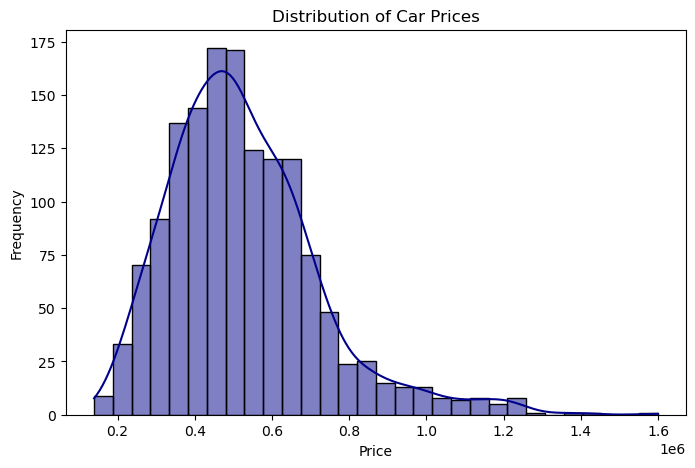

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

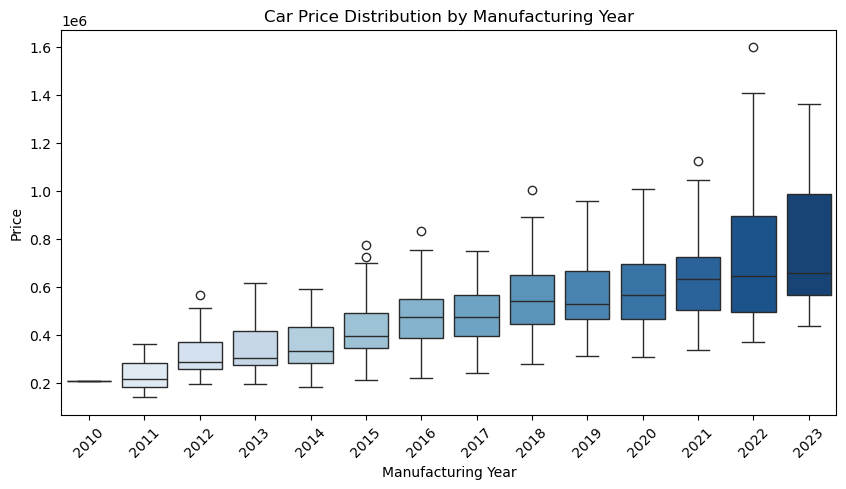

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Manufacturing_year'], y=df['Price'], palette='Blues')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.show()

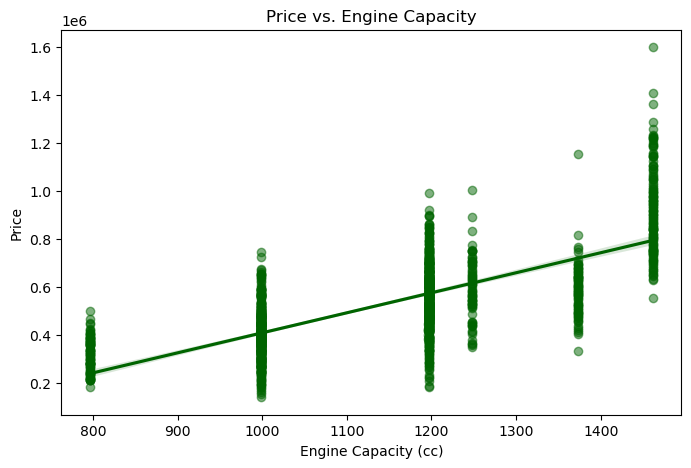

In [25]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Engine capacity'], y=df['Price'], scatter_kws={'alpha':0.5}, color='darkgreen')
plt.title('Price vs. Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price')
plt.show()

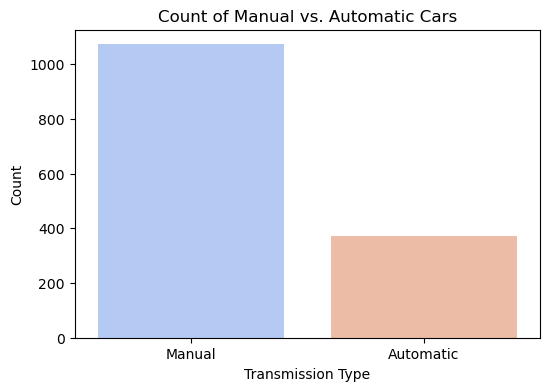

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Transmission'], palette='coolwarm')
plt.title('Count of Manual vs. Automatic Cars')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

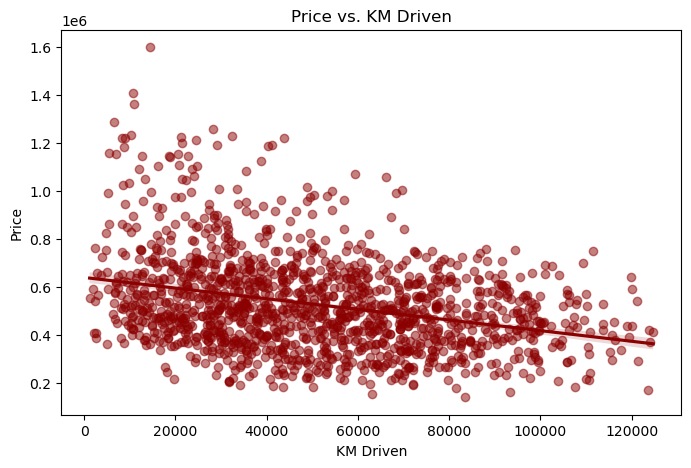

In [27]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df['KM driven'], y=df['Price'], scatter_kws={'alpha':0.5}, color='darkred')
plt.title('Price vs. KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Price')
plt.show()

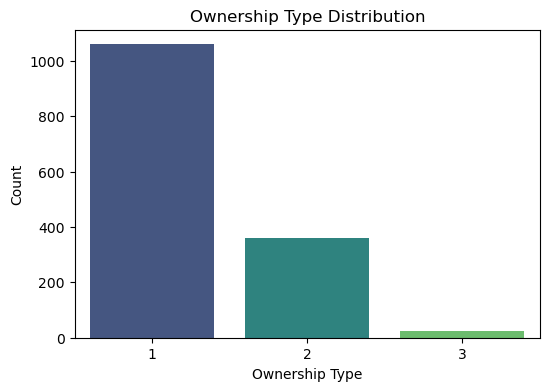

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Ownership'], palette='viridis')
plt.title('Ownership Type Distribution')
plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.show()

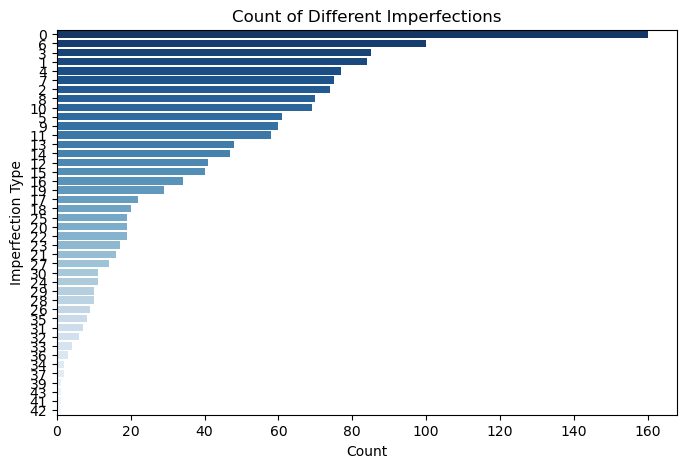

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Imperfections'], order=df['Imperfections'].value_counts().index, palette='Blues_r')
plt.title('Count of Different Imperfections')
plt.xlabel('Count')
plt.ylabel('Imperfection Type')
plt.show()

In [32]:
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 8.89M/8.89M [00:00<00:00, 10.4MB/s]

Extracting files...


Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2
